#An Institution wishes to find out their student’s ability in mathematics, reading and writing skills. The Institution wants to do an exploratory study to check the following information.



In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Reading the data set
data= pd.read_csv('/content/StudentsPerformance.csv')


Checking information of dataset

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [71]:
data.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


Display data

In [72]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


Check null value count . No null values

In [73]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [74]:
data.shape

(1000, 8)

1. Find out how many males and females participated in the test.


In [75]:
gender_count = data['gender'].value_counts()
print(gender_count)


female    518
male      482
Name: gender, dtype: int64


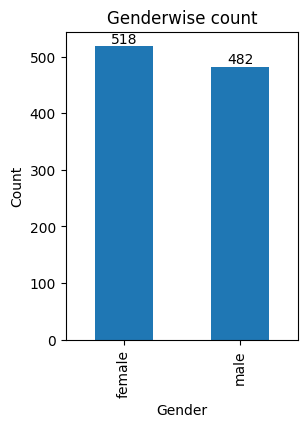

In [76]:
#Bar chart based on gender count
plt.figure(figsize=(3,4))
plt.title('Genderwise count')
plt.xlabel('Gender')
plt.ylabel('Count')
gender_count.plot(kind='bar')
# Adding values on top of each bar
for i, value in enumerate(gender_count):
    plt.text(i, value, str(value), ha='center', va='bottom')
plt.show()


**Observation**: Count of females and males participated in test is almost equal.

2. What do you think about the students' parental level of education?

In [77]:
data['parental level of education'].value_counts()


some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [78]:
#Bar chart based on Parental level of education
#data['parental level of education'].value_counts().plot(kind='bar')
#plt.title('Comparison of Parental Education')
#plt.xlabel('Degree')
#plt.ylabel('count')
#plt.show()


(-1.25, 1.25, -1.25, 1.25)

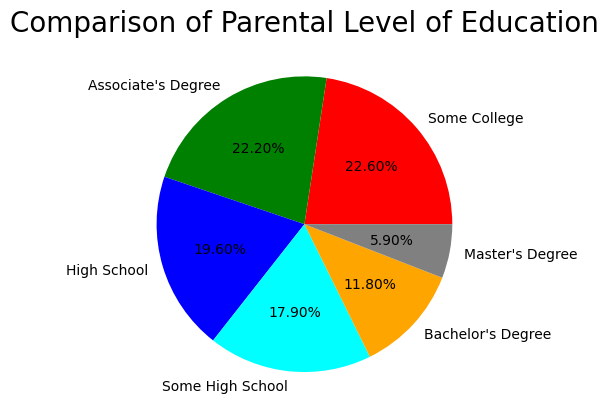

In [79]:
#Pie chart showing Percentage of Parental level of education
size = data['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Comparison of Parental Level of Education', fontsize=20)
plt.axis('off')

**Observation**:
The predominant parental education levels in the dataset are 'Some college,' 'Associate's degree,' and 'High school,' while the least common is 'Master's degree.'

In [80]:
#Check the relationship between Parentel level of Education and students score
data['average_score'] = (data['math score'] + data['writing score'] + data['reading score']) / 3
print(data['average_score'])

0        9.000000
1       18.333333
2       26.000000
3       27.000000
4       31.333333
          ...    
995     89.000000
996     94.000000
997     98.666667
998     97.666667
999    100.000000
Name: average_score, Length: 1000, dtype: float64


In [81]:
df1 = data.groupby(['parental level of education'])[['reading score', 'math score', 'writing score']].mean().sort_values('math score',ascending=False)
df1

,reading score,math score,writing score
parental level of education,,,
master's degree,75.949153,70.254237,75.677966
bachelor's degree,73.000000,69.288136,73.381356
associate's degree,71.018018,67.977477,70.031532
some college,69.566372,67.128319,69.035398
some high school,66.759777,63.134078,64.888268
high school,64.602041,61.821429,62.403061


Text(0.5, 1.0, 'Parental level of education vs Scores')

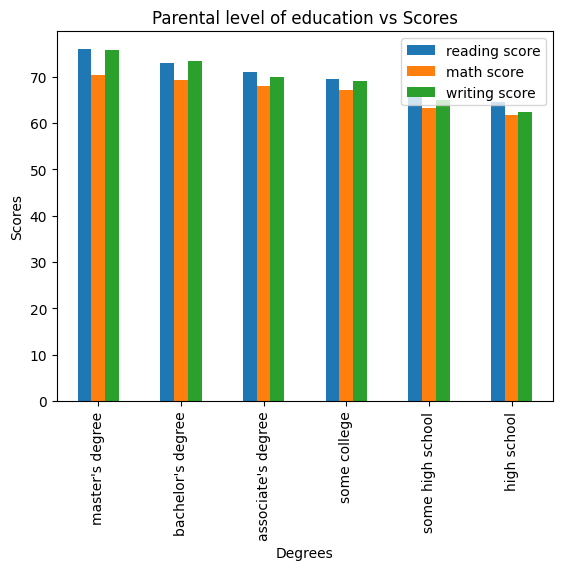

In [82]:
df1.plot(kind='bar')
plt.xlabel('Degrees')
plt.ylabel('Scores')
plt.title('Parental level of education vs Scores')

**Observation**: The academic performance of students is influenced by the parental level of education, with those whose parents have attained a master's degree exhibiting the highest scores.

3. Who scores the most on average for math, reading and writing based on
● Gender
● Test preparation course


In [83]:
# Find the gender with the highest average score for each subject
average_scores = data.groupby('gender').mean()
highest_math_score_gender = average_scores['math score'].idxmax()
highest_reading_score_gender = average_scores['reading score'].idxmax()
highest_writing_score_gender = average_scores['writing score'].idxmax()
print(f"The gender with the highest average math score is: {highest_math_score_gender}")
print(f"The gender with the highest average reading score is: {highest_reading_score_gender}")
print(f"The gender with the highest average writing score is: {highest_writing_score_gender}")


The gender with the highest average math score is: male
The gender with the highest average reading score is: female
The gender with the highest average writing score is: female


<ipython-input-83-4dd15db6e027>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_scores = data.groupby('gender').mean()


**Obsevation**: Male students achieved the highest score in mathematics, while female students achieved highest score in other subjects.

In [84]:
# Find the test preparation course with the highest average score for each subject
average_scores = data.groupby('test preparation course').mean()
highest_math_score_course = average_scores['math score'].idxmax()
highest_reading_score_course = average_scores['reading score'].idxmax()
highest_writing_score_course = average_scores['writing score'].idxmax()

print(f"The test preparation course with the highest average math score is: {highest_math_score_course}")
print(f"The test preparation course with the highest average reading score is: {highest_reading_score_course}")
print(f"The test preparation course with the highest average writing score is: {highest_writing_score_course}")


The test preparation course with the highest average math score is: completed
The test preparation course with the highest average reading score is: completed
The test preparation course with the highest average writing score is: completed


<ipython-input-84-2dcb21f1e80d>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_scores = data.groupby('test preparation course').mean()


**Obsevation**: Students who completed test preparation course achieved the highest scores in all subjects.

4. What do you think about the scoring variation for math, reading and writing
based on
● Gender
● Test preparation course



        math score  reading score  writing score
gender                                          
female   16.029928      14.411018      14.844842
male     14.556411      14.149594      14.227225


<Figure size 1000x600 with 0 Axes>

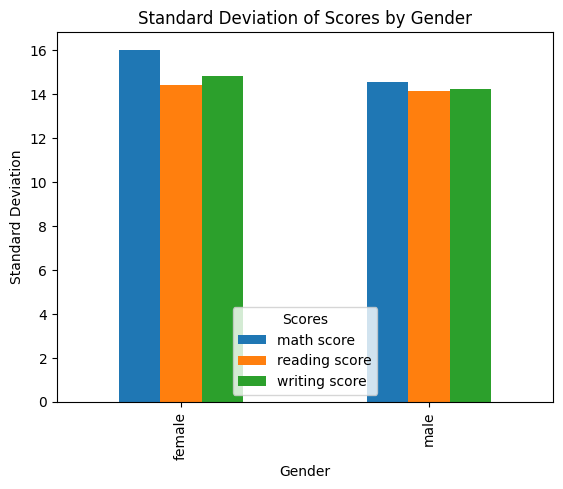

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate standard deviation for scores by gender
std_dev = data[['gender','math score','reading score','writing score']].groupby('gender').std()
print(std_dev)
# Plotting standard deviation
plt.figure(figsize=(10, 6))
std_dev.plot(kind='bar')
plt.title('Standard Deviation of Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Standard Deviation')
plt.legend(title='Scores')
plt.show()


**Observation**: The scoring variation of male students in all subjects are almost equale and less than the female students. But in the case of female students scoring variations in reading and writing  are slightly higher than the male students  and maths score shows higher variation.

Based on Test preparation course


                         math score  reading score  writing score
test preparation course                                          
completed                 14.521847      13.537572      13.236412
none                      15.705689      14.608896      15.041667


<Figure size 1000x600 with 0 Axes>

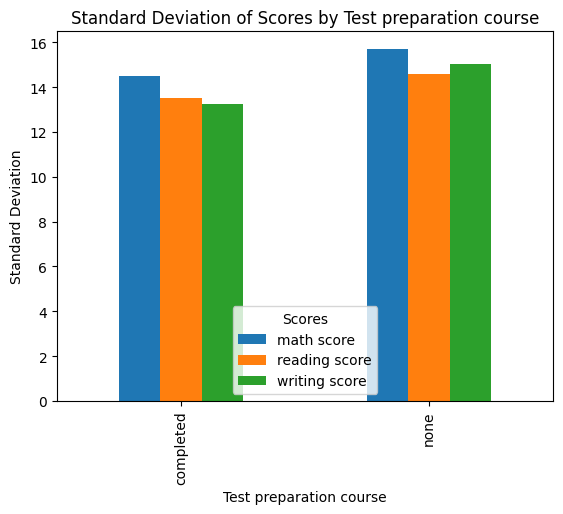

In [86]:

# Calculate standard deviation for scores by Test preparation course

std_dev2 = data[['test preparation course','math score','reading score','writing score']].groupby('test preparation course').std()
print(std_dev2)

# Plotting standard deviation
plt.figure(figsize=(10, 6))
std_dev2.plot(kind='bar')
plt.title('Standard Deviation of Scores by Test preparation course')
plt.xlabel('Test preparation course')
plt.ylabel('Standard Deviation')
plt.legend(title='Scores')
plt.show()


**Observation** : Students who have not completed the test preparation course exhibit a greater variation in scores compared to those who have completed the course.

5. The management needs your help to give bonus points to the top 25% of
students based on their math score, so how will you help the management
to achieve this


In [87]:
# Sort the Data based on Math_Score in descending order
top_25_percent = int(0.25 * len(data))
data.nlargest(top_25_percent, ['math score'])

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
515,female,group E,some college,standard,none,100,92,97,96.333333
516,female,group E,bachelor's degree,standard,none,100,100,100,100.000000
517,female,group E,associate's degree,standard,none,100,100,100,100.000000
996,male,group A,some college,standard,completed,100,96,86,94.000000
997,male,group D,some college,standard,completed,100,97,99,98.666667
...,...,...,...,...,...,...,...,...,...
428,female,group D,some college,free/reduced,none,77,86,86,83.000000
429,female,group E,some high school,standard,none,77,79,80,78.666667
849,male,group A,bachelor's degree,standard,none,77,67,68,70.666667
850,male,group C,associate's degree,free/reduced,none,77,67,64,69.333333


This is the list of students to give bonus mark.